In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
iris = load_iris()
X= iris.data[:,2:]
y = iris.target

In [10]:
tree_clf = DecisionTreeClassifier(max_depth = None)
tree_clf.fit(X,y)

DecisionTreeClassifier()

In [21]:
from sklearn.tree import export_graphviz

In [12]:
export_graphviz(tree_clf, out_file = "iris_tree.dot",
                feature_names = iris.feature_names[2:], 
                class_names = iris.target_names, 
                rounded = True, filled = True)

In [4]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 10000, noise = 0.4)

In [5]:
import matplotlib.pyplot as plt

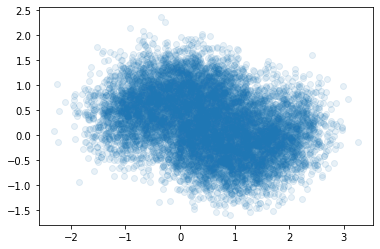

In [6]:
plt.scatter(X[:,0], X[:,1], alpha = 0.1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [19]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=0.2, max_depth=2, max_features=0.1)

In [20]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8648484848484849